Original code by **Raghavender Ganesh**.   
Updated with better documentation and code readability.
### Information Extraction from Structured Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

Example Data

In [ ]:
data = {
    "Patient_ID": [1, 2, 3, 4, 5],
    "Age": [34, 45, 23, 50, 40],
    "Gender": ["M", "F", "F", "M", "M"],
    "Diagnosis": ["Diabetes", "Hypertension", "Asthma", "Diabetes", "Hypertension"]
}

Dataframe

In [ ]:
df = pd.DataFrame(data)

df.head()

,Patient_ID,Age,Gender,Diagnosis
0,1,34,M,Diabetes
1,2,45,F,Hypertension
2,3,23,F,Asthma
3,4,50,M,Diabetes
4,5,40,M,Hypertension


### Preprocessing

In [8]:
df['Gender'] = df['Gender'].map({"M": 0, "F": 1})
df = pd.get_dummies(df, columns=['Diagnosis'])
df = df.drop(["Patient_ID"], axis=1, errors='ignore')

df.head()

,Age,Gender,Diagnosis_Asthma,Diagnosis_Diabetes,Diagnosis_Hypertension
0,34,0,False,True,False
1,45,1,False,False,True
2,23,1,True,False,False
3,50,0,False,True,False
4,40,0,False,False,True


## PCA

In [11]:
# Convert boolean columns to int for PCA
X = df.astype(float)

In [12]:
# Apply PCA
pca = PCA(n_components=2)
pca_list = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_list, columns=['PCA1', 'PCA2'])

pca_df.head()

,PCA1,PCA2
0,-4.377479,0.887456
1,6.592079,-0.963523
2,-15.436884,-0.190821
3,11.604338,0.686830
4,1.617946,-0.419942


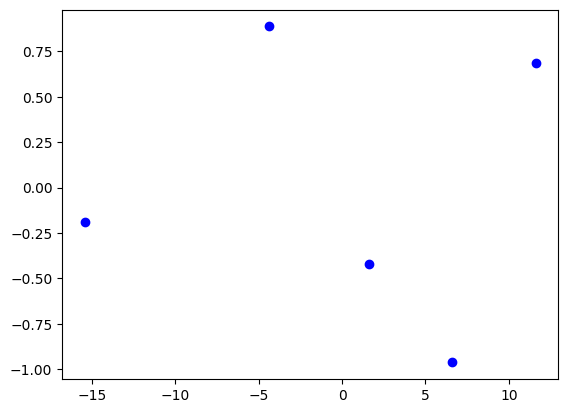

In [15]:
# Visualize PCA results
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c='blue')
plt.show()